In [1]:
%load_ext autoreload
%autoreload 2
%aimport fluidsim
from paths import load_df, paths_lap as paths_sim

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Compose a function to calculate the shock population of one run

In [2]:
from peak_detection import (
    detect_shocks,
    avg_shock_seperation_1d,
    avg_shock_seperation,
    avg_shock_seperation_from_shortname
)

In [4]:
df = load_df("df_lap")
df = df[(df["$n$"] == 960) | (df["$n$"] == 2880)]
df.head()

,$n$,$c$,$\nu_8$,$\nu_2$,$f$,$\epsilon$,$\frac{k_{diss}}{k_f}$,$F_f$,$Ro_f$,$Bu$,$\frac{<\bf \Omega_0 >}{{(P k_f^2)}^{2/3}}$,$E$,$t_{stat}$,$t_{\max}$,short name
1,960.0,10.0,0.0,0.098468,0.0,0.997526,22.635370,0.109779,inf,inf,1.0,2.039249,3.437500,25.002928,noise_c10nh960Buinf
3,2880.0,10.0,0.0,0.032823,0.0,0.983749,67.906109,0.109272,inf,inf,1.0,2.352529,3.725254,24.953155,noise_c10nh2880Buinf
6,960.0,20.0,0.0,0.098468,0.0,0.994178,22.635370,0.054828,inf,inf,1.0,2.189555,3.757812,24.984375,noise_c20nh960Buinf
7,2880.0,20.0,0.0,0.032823,0.0,0.981759,67.906109,0.054599,inf,inf,1.0,2.765744,4.430556,24.946181,noise_c20nh2880Buinf
8,960.0,40.0,0.0,0.098468,0.0,0.984611,22.635370,0.027326,inf,inf,1.0,2.499448,4.010417,24.964844,noise_c40nh960Buinf


In [5]:
short = df.iloc[3]["short name"]
paths_sim[short]

'/run/media/avmo/lacie/13KTH/laplacian_nupt1/SW1Lwaves_noise_c=20_Bu=inf_beta=0.0_2880x2880_S50x50_2019-02-01_16-46-55'

In [6]:
%%capture
from fluidsim import load_state_phys_file

sim = load_state_phys_file(paths_sim[short], merge_missing_params=True)

Detected 7 peaks


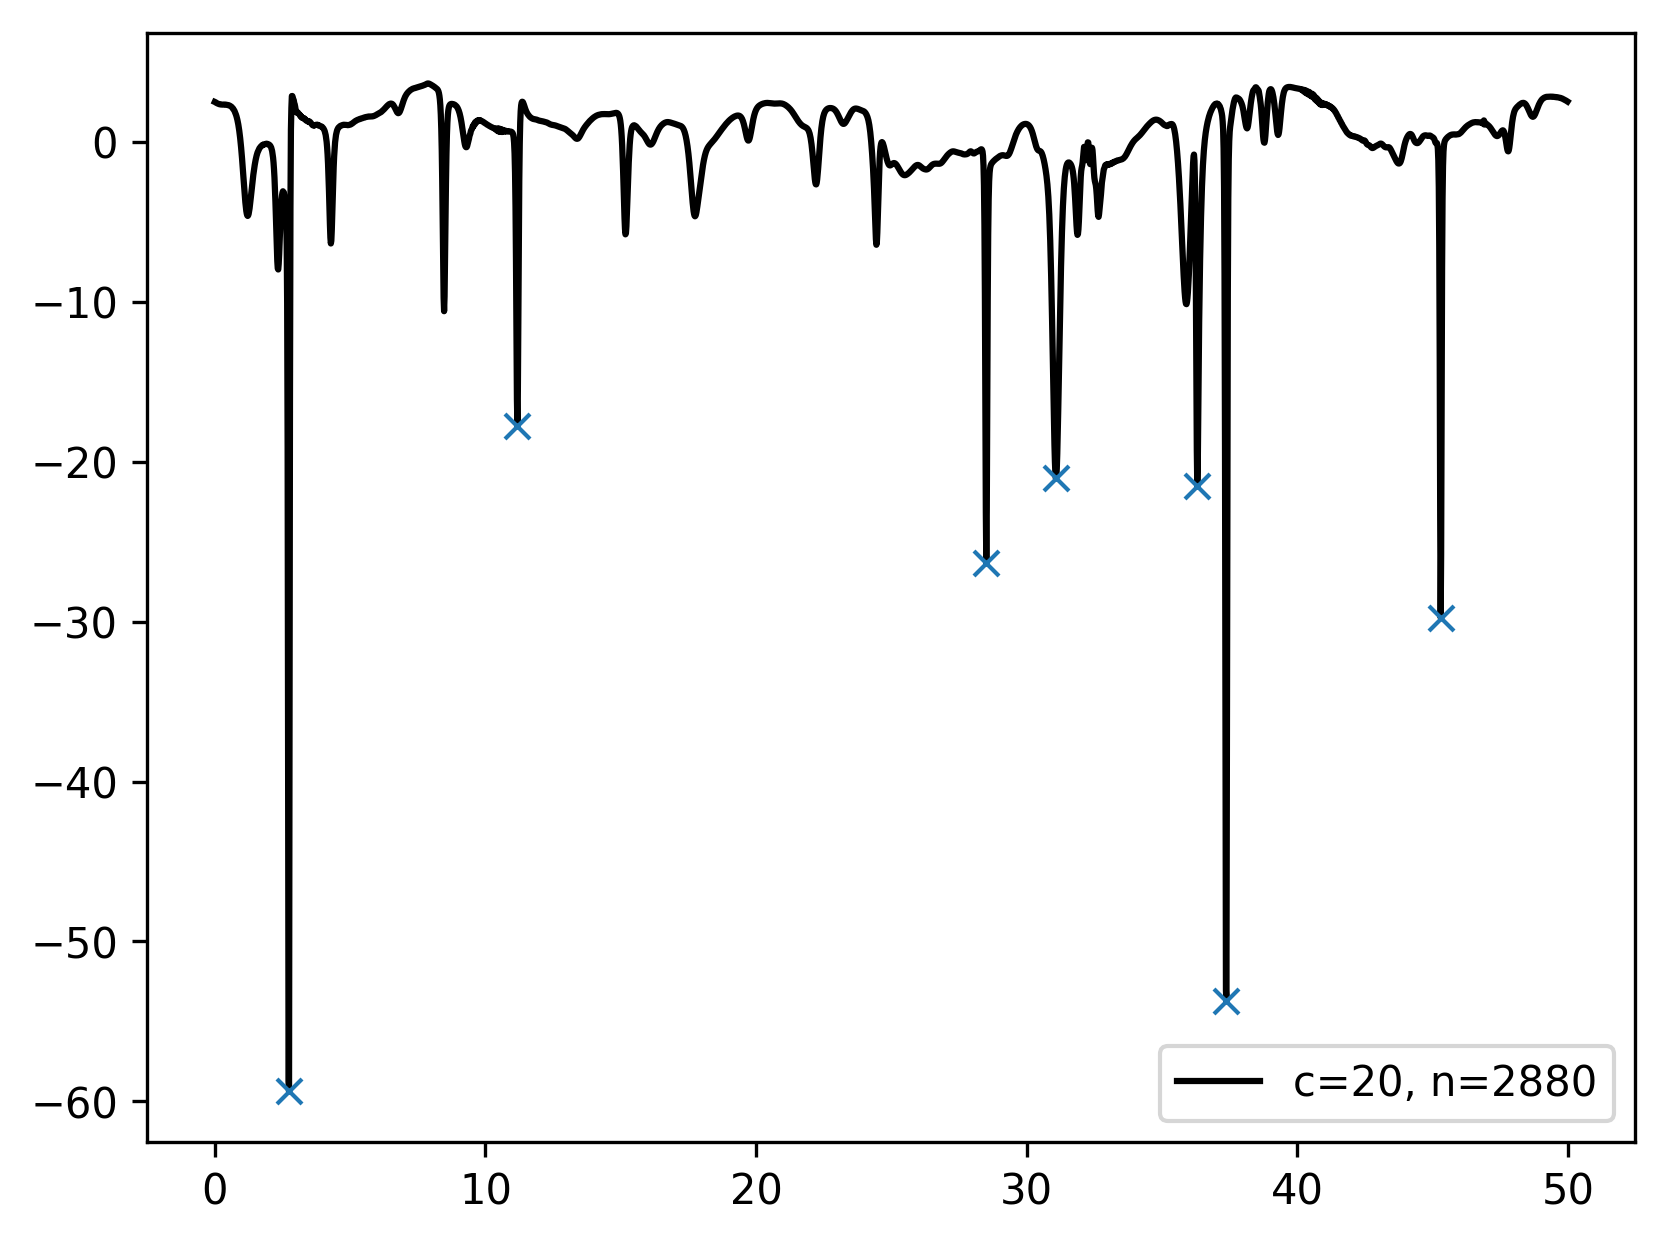

In [9]:
%matplotlib inline
# from scipy.signal import find_peaks, find_peaks_cwt
detect_shocks(sim, sim.oper.nx_seq // 3, thres=0.3, debug=True)

In [10]:
avg_shock_seperation_1d(sim, sim.oper.nx // 3)

7.142857142857143

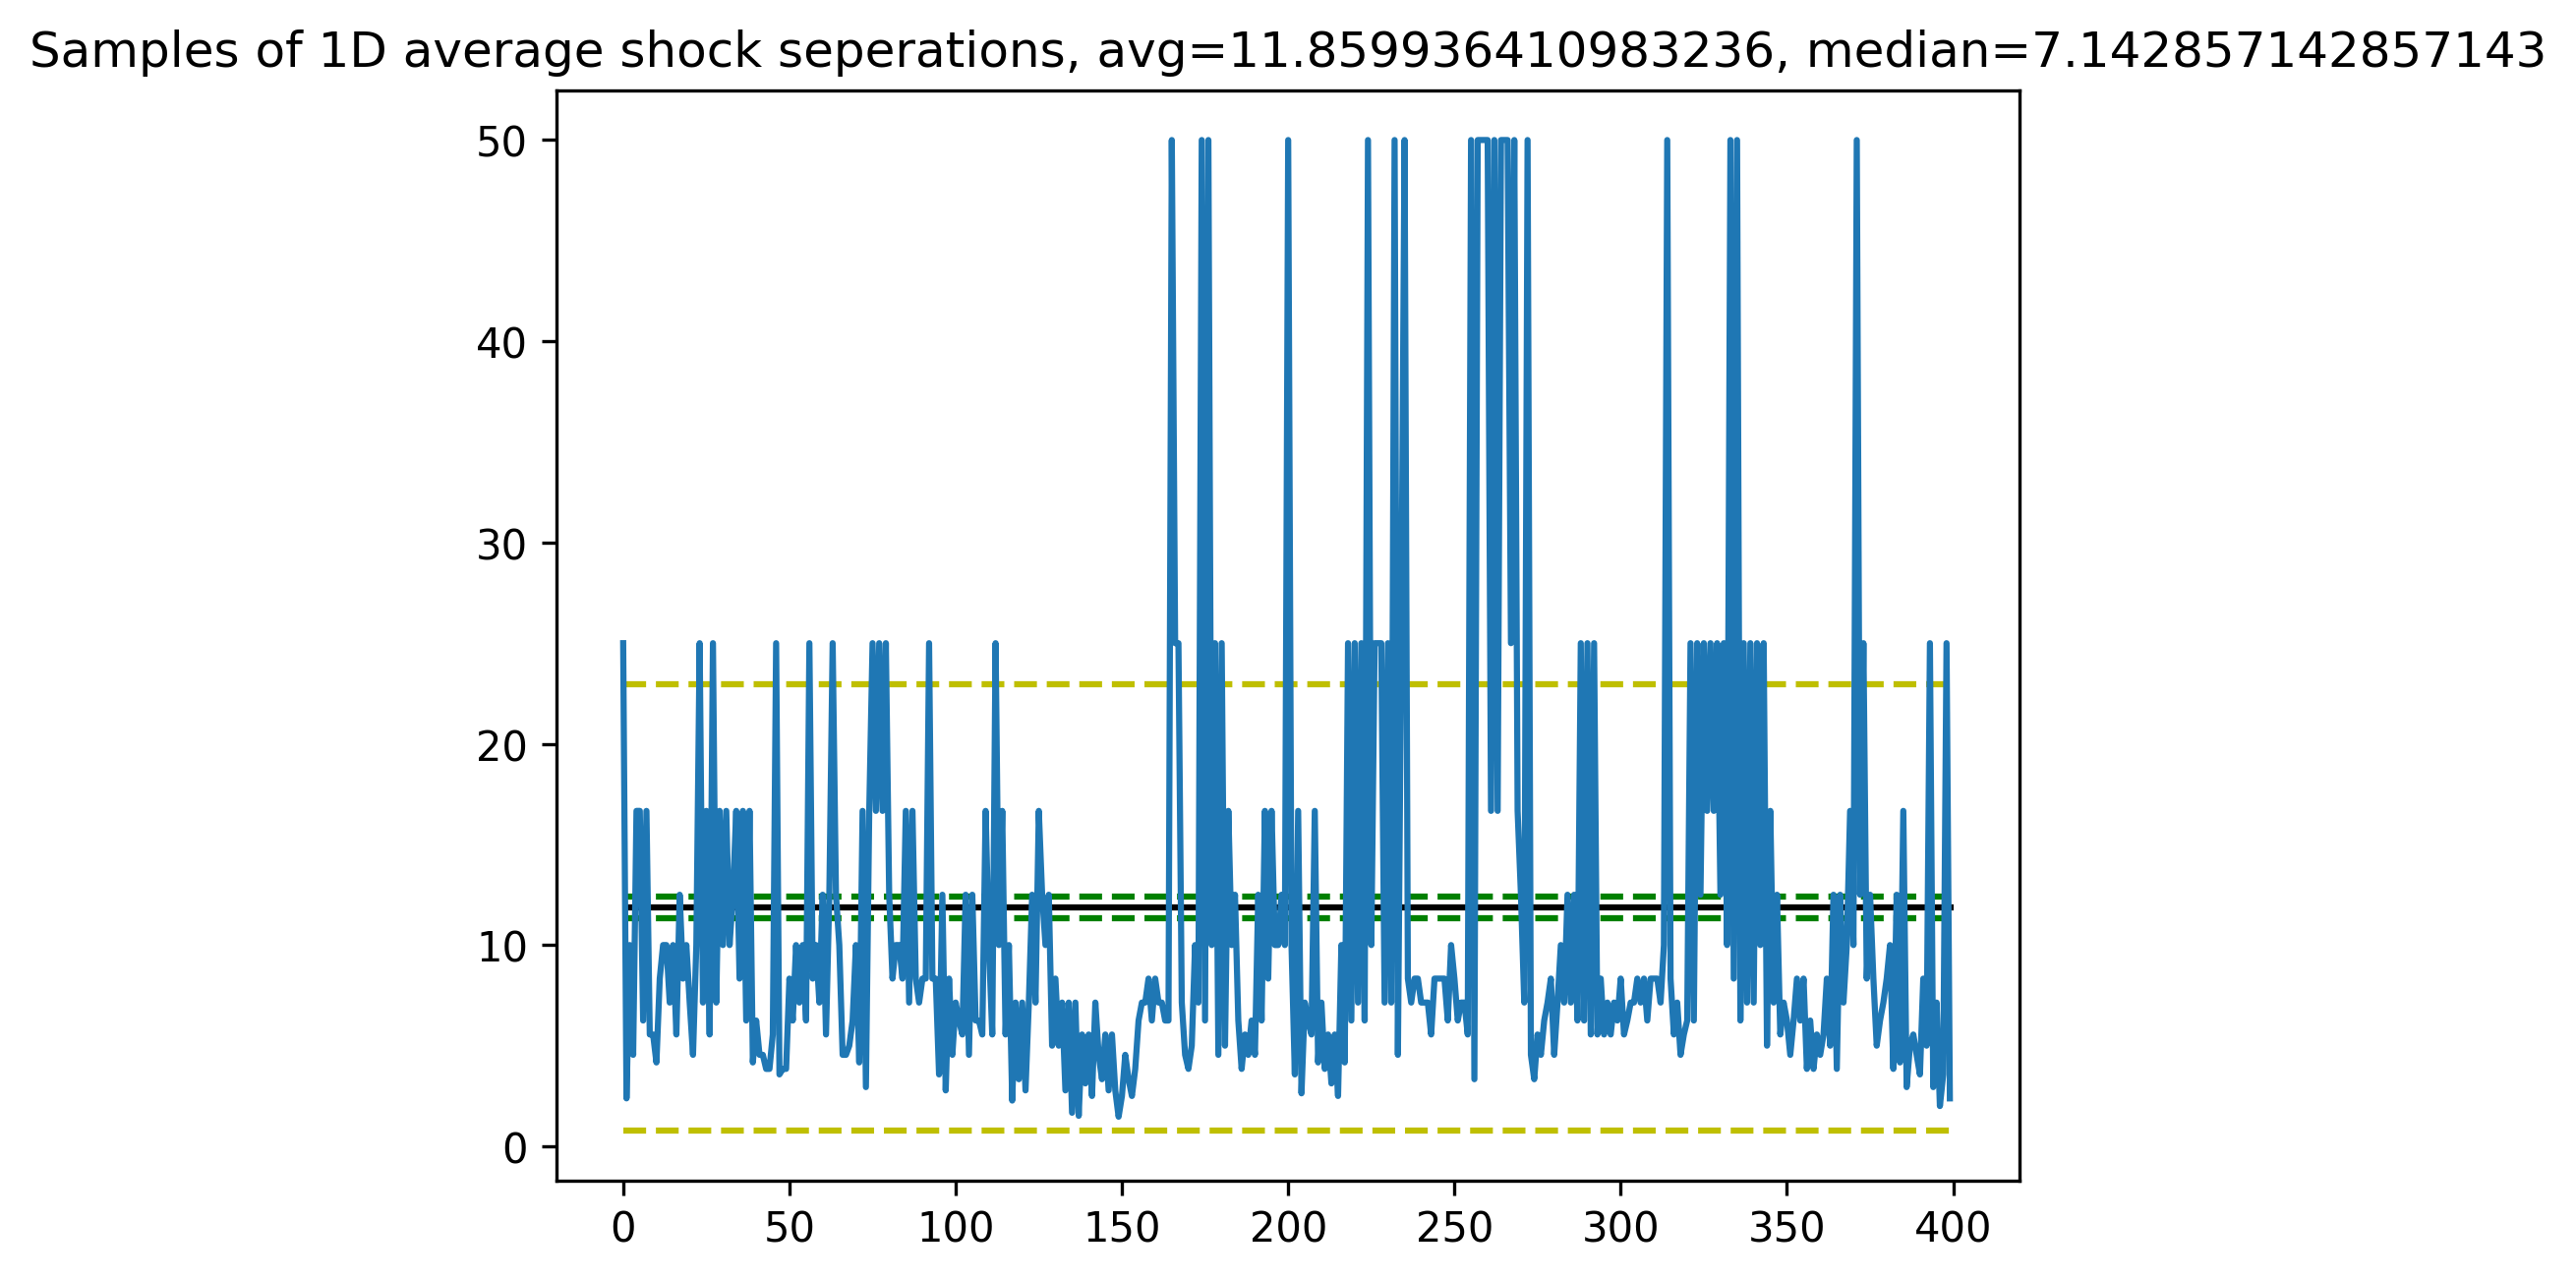

In [11]:
import matplotlib.pyplot as plt
import numpy as np

ds_avg = avg_shock_seperation(sim, 200, averaged=False)
plt.figure(dpi=150)
ds_avg2 = np.nanmean(ds_avg)
ds_std = np.nanstd(ds_avg)
ds_median = np.median(ds_avg)
ds_ci = 0.95 * ds_std / (2 * 200) ** 0.5
plt.title(f"Samples of 1D average shock seperations, avg={ds_avg2}, median={ds_median}")
plt.hlines([ds_avg2], 0, len(ds_avg))
plt.hlines([ds_avg2+ds_std, ds_avg2-ds_std], 0, len(ds_avg), 'y', linestyles='dashed')
plt.hlines([ds_avg2+ds_ci, ds_avg2-ds_ci], 0, len(ds_avg), 'g', linestyles='dashed')
plt.plot(ds_avg)

# Compute inside notebook

In [23]:
# %%capture
import pandas as pd
result = df["short name"].apply(
    avg_shock_seperation_from_shortname,
    dict_paths=paths_sim
).apply(
    pd.Series
)

In [41]:
mean = result[0]
ci = result[1]
result

,0,1
1,11.838812,0.467922
3,13.642681,0.498844
6,9.315634,0.425219
7,11.859936,0.527198
8,7.604018,0.438621
9,9.770212,0.483018
10,3.387881,0.140791
11,6.413627,0.317636
12,2.150066,0.022336
13,2.889848,0.218492


In [ ]:
from base import _k_f, load_params
import fluidsim as fs

Lf = np.pi / _k_f(load_params(paths_sim[short]))
df["shock separation"] = mean / Lf
df["shock separation ci"] = ci / Lf
df.head()

# Load cached data

In [3]:
import pandas as pd
import numpy as np
from paths import load_df
from base import _k_f

#df = load_df()
df = load_df("df_lap")
df.set_index("short name", inplace=True, drop=False)

# filter by resolution
# df = df[(df["$n$"] == 960) | (df["$n$"] == 2880)]

df

,$n$,$c$,$\nu_8$,$\nu_2$,$f$,$\epsilon$,$\frac{k_{diss}}{k_f}$,$F_f$,$Ro_f$,$Re$,$ReF_f^{2/3}$,$Bu$,$\frac{<\bf \Omega_0 >}{{(P k_f^2)}^{2/3}}$,$E$,$t_{stat}$,$t_{\max}$,short name
short name,,,,,,,,,,,,,,,,,
noise_c10nh960Buinf,960.0,10.0,0.0,0.098468,0.0,0.997526,22.635370,0.160782,inf,68.034580,20.116612,inf,1.0,2.039249,3.437500,25,noise_c10nh960Buinf
noise_c10nh1920Buinf,1920.0,10.0,0.0,0.049234,0.0,0.985498,45.270739,0.160133,inf,135.520058,39.962988,inf,1.0,2.255547,3.542874,25,noise_c10nh1920Buinf
noise_c10nh2880Buinf,2880.0,10.0,0.0,0.032823,0.0,0.983749,67.906109,0.160038,inf,203.159711,59.885331,inf,1.0,2.352529,3.725254,25,noise_c10nh2880Buinf
noise_c10nh3840Buinf,3840.0,10.0,0.0,0.024617,0.0,0.993152,90.541479,0.160547,inf,271.739936,80.270217,inf,1.0,2.481549,4.012738,25,noise_c10nh3840Buinf
noise_c10nh7680Buinf,7680.0,10.0,0.0,0.012309,0.0,1.002571,181.082957,0.161053,inf,545.192706,161.384586,inf,1.0,2.868348,3.606028,25,noise_c10nh7680Buinf
noise_c20nh960Buinf,960.0,20.0,0.0,0.098468,0.0,0.994178,22.635370,0.080301,inf,67.958383,12.649025,inf,1.0,2.189555,3.757812,25,noise_c20nh960Buinf
noise_c20nh2880Buinf,2880.0,20.0,0.0,0.032823,0.0,0.981759,67.906109,0.079965,inf,203.022655,37.682987,inf,1.0,2.765744,4.430556,25,noise_c20nh2880Buinf
noise_c20nh3840Buinf,3840.0,20.0,0.0,0.024617,0.0,0.983457,90.541479,0.080011,inf,270.852816,50.292233,inf,1.0,2.989169,4.511719,25,noise_c20nh3840Buinf
noise_c20nh7680Buinf,7680.0,20.0,0.0,0.012309,0.0,1.001460,181.082957,0.080497,inf,544.991219,101.603305,inf,1.0,3.539059,5.414062,25,noise_c20nh7680Buinf


In [4]:
_dfs = []

for t in range(10, 26):
    _df = pd.read_csv(
        # "dataframes/shock_sep_laplacian_nupt1.csv",
        f"dataframes/shock_sep_laplacian_nupt1_by_counting_t{t}.csv",
        comment="#"
    )
    _dfs.append(_df.set_index("short_name"))
    
_df_concat = pd.concat(_dfs, keys=range(10,26))
df_shock_sep = _df_concat.groupby(level=1).mean()
df_shock_sep

,mean,std
short_name,,
noise_c100nh2880Buinf,5.845837,0.365770
noise_c100nh3840Buinf,5.803499,0.351222
noise_c100nh960Buinf,3.486377,0.181590
noise_c10nh1920Buinf,12.985308,0.490575
noise_c10nh2880Buinf,13.904116,0.519329
noise_c10nh3840Buinf,14.423506,0.544354
noise_c10nh7680Buinf,14.872970,0.545566
noise_c10nh960Buinf,10.821225,0.435349
noise_c200nh2880Buinf,2.544082,0.177357


In [5]:
df_shock_sep.to_csv("dataframes/shock_sep_laplacian_nupt1_by_counting_mean.csv")

In [6]:
%%capture
import fluidsim as fs
from paths import paths_lap as paths_sim


sim = fs.load_sim_for_plot(paths_sim[df_shock_sep.iloc[0].name])
Lf = np.pi / _k_f(sim.params)

In [7]:
df["shock separation"] = df_shock_sep["mean"] / Lf
df.head()

,$n$,$c$,$\nu_8$,$\nu_2$,$f$,$\epsilon$,$\frac{k_{diss}}{k_f}$,$F_f$,$Ro_f$,$Re$,$ReF_f^{2/3}$,$Bu$,$\frac{<\bf \Omega_0 >}{{(P k_f^2)}^{2/3}}$,$E$,$t_{stat}$,$t_{\max}$,short name,shock separation
short name,,,,,,,,,,,,,,,,,,
noise_c10nh960Buinf,960.0,10.0,0.0,0.098468,0.0,0.997526,22.635370,0.160782,inf,68.034580,20.116612,inf,1.0,2.039249,3.437500,25,noise_c10nh960Buinf,2.597094
noise_c10nh1920Buinf,1920.0,10.0,0.0,0.049234,0.0,0.985498,45.270739,0.160133,inf,135.520058,39.962988,inf,1.0,2.255547,3.542874,25,noise_c10nh1920Buinf,3.116474
noise_c10nh2880Buinf,2880.0,10.0,0.0,0.032823,0.0,0.983749,67.906109,0.160038,inf,203.159711,59.885331,inf,1.0,2.352529,3.725254,25,noise_c10nh2880Buinf,3.336988
noise_c10nh3840Buinf,3840.0,10.0,0.0,0.024617,0.0,0.993152,90.541479,0.160547,inf,271.739936,80.270217,inf,1.0,2.481549,4.012738,25,noise_c10nh3840Buinf,3.461641
noise_c10nh7680Buinf,7680.0,10.0,0.0,0.012309,0.0,1.002571,181.082957,0.161053,inf,545.192706,161.384586,inf,1.0,2.868348,3.606028,25,noise_c10nh7680Buinf,3.569513


In [8]:
df["shock separation"] = df_shock_sep["mean"] / Lf
df.head()

,$n$,$c$,$\nu_8$,$\nu_2$,$f$,$\epsilon$,$\frac{k_{diss}}{k_f}$,$F_f$,$Ro_f$,$Re$,$ReF_f^{2/3}$,$Bu$,$\frac{<\bf \Omega_0 >}{{(P k_f^2)}^{2/3}}$,$E$,$t_{stat}$,$t_{\max}$,short name,shock separation
short name,,,,,,,,,,,,,,,,,,
noise_c10nh960Buinf,960.0,10.0,0.0,0.098468,0.0,0.997526,22.635370,0.160782,inf,68.034580,20.116612,inf,1.0,2.039249,3.437500,25,noise_c10nh960Buinf,2.597094
noise_c10nh1920Buinf,1920.0,10.0,0.0,0.049234,0.0,0.985498,45.270739,0.160133,inf,135.520058,39.962988,inf,1.0,2.255547,3.542874,25,noise_c10nh1920Buinf,3.116474
noise_c10nh2880Buinf,2880.0,10.0,0.0,0.032823,0.0,0.983749,67.906109,0.160038,inf,203.159711,59.885331,inf,1.0,2.352529,3.725254,25,noise_c10nh2880Buinf,3.336988
noise_c10nh3840Buinf,3840.0,10.0,0.0,0.024617,0.0,0.993152,90.541479,0.160547,inf,271.739936,80.270217,inf,1.0,2.481549,4.012738,25,noise_c10nh3840Buinf,3.461641
noise_c10nh7680Buinf,7680.0,10.0,0.0,0.012309,0.0,1.002571,181.082957,0.161053,inf,545.192706,161.384586,inf,1.0,2.868348,3.606028,25,noise_c10nh7680Buinf,3.569513


/scratch/avmo/opt/augier_vishnu_lindborg_sw1l/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/scratch/avmo/opt/augier_vishnu_lindborg_sw1l/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


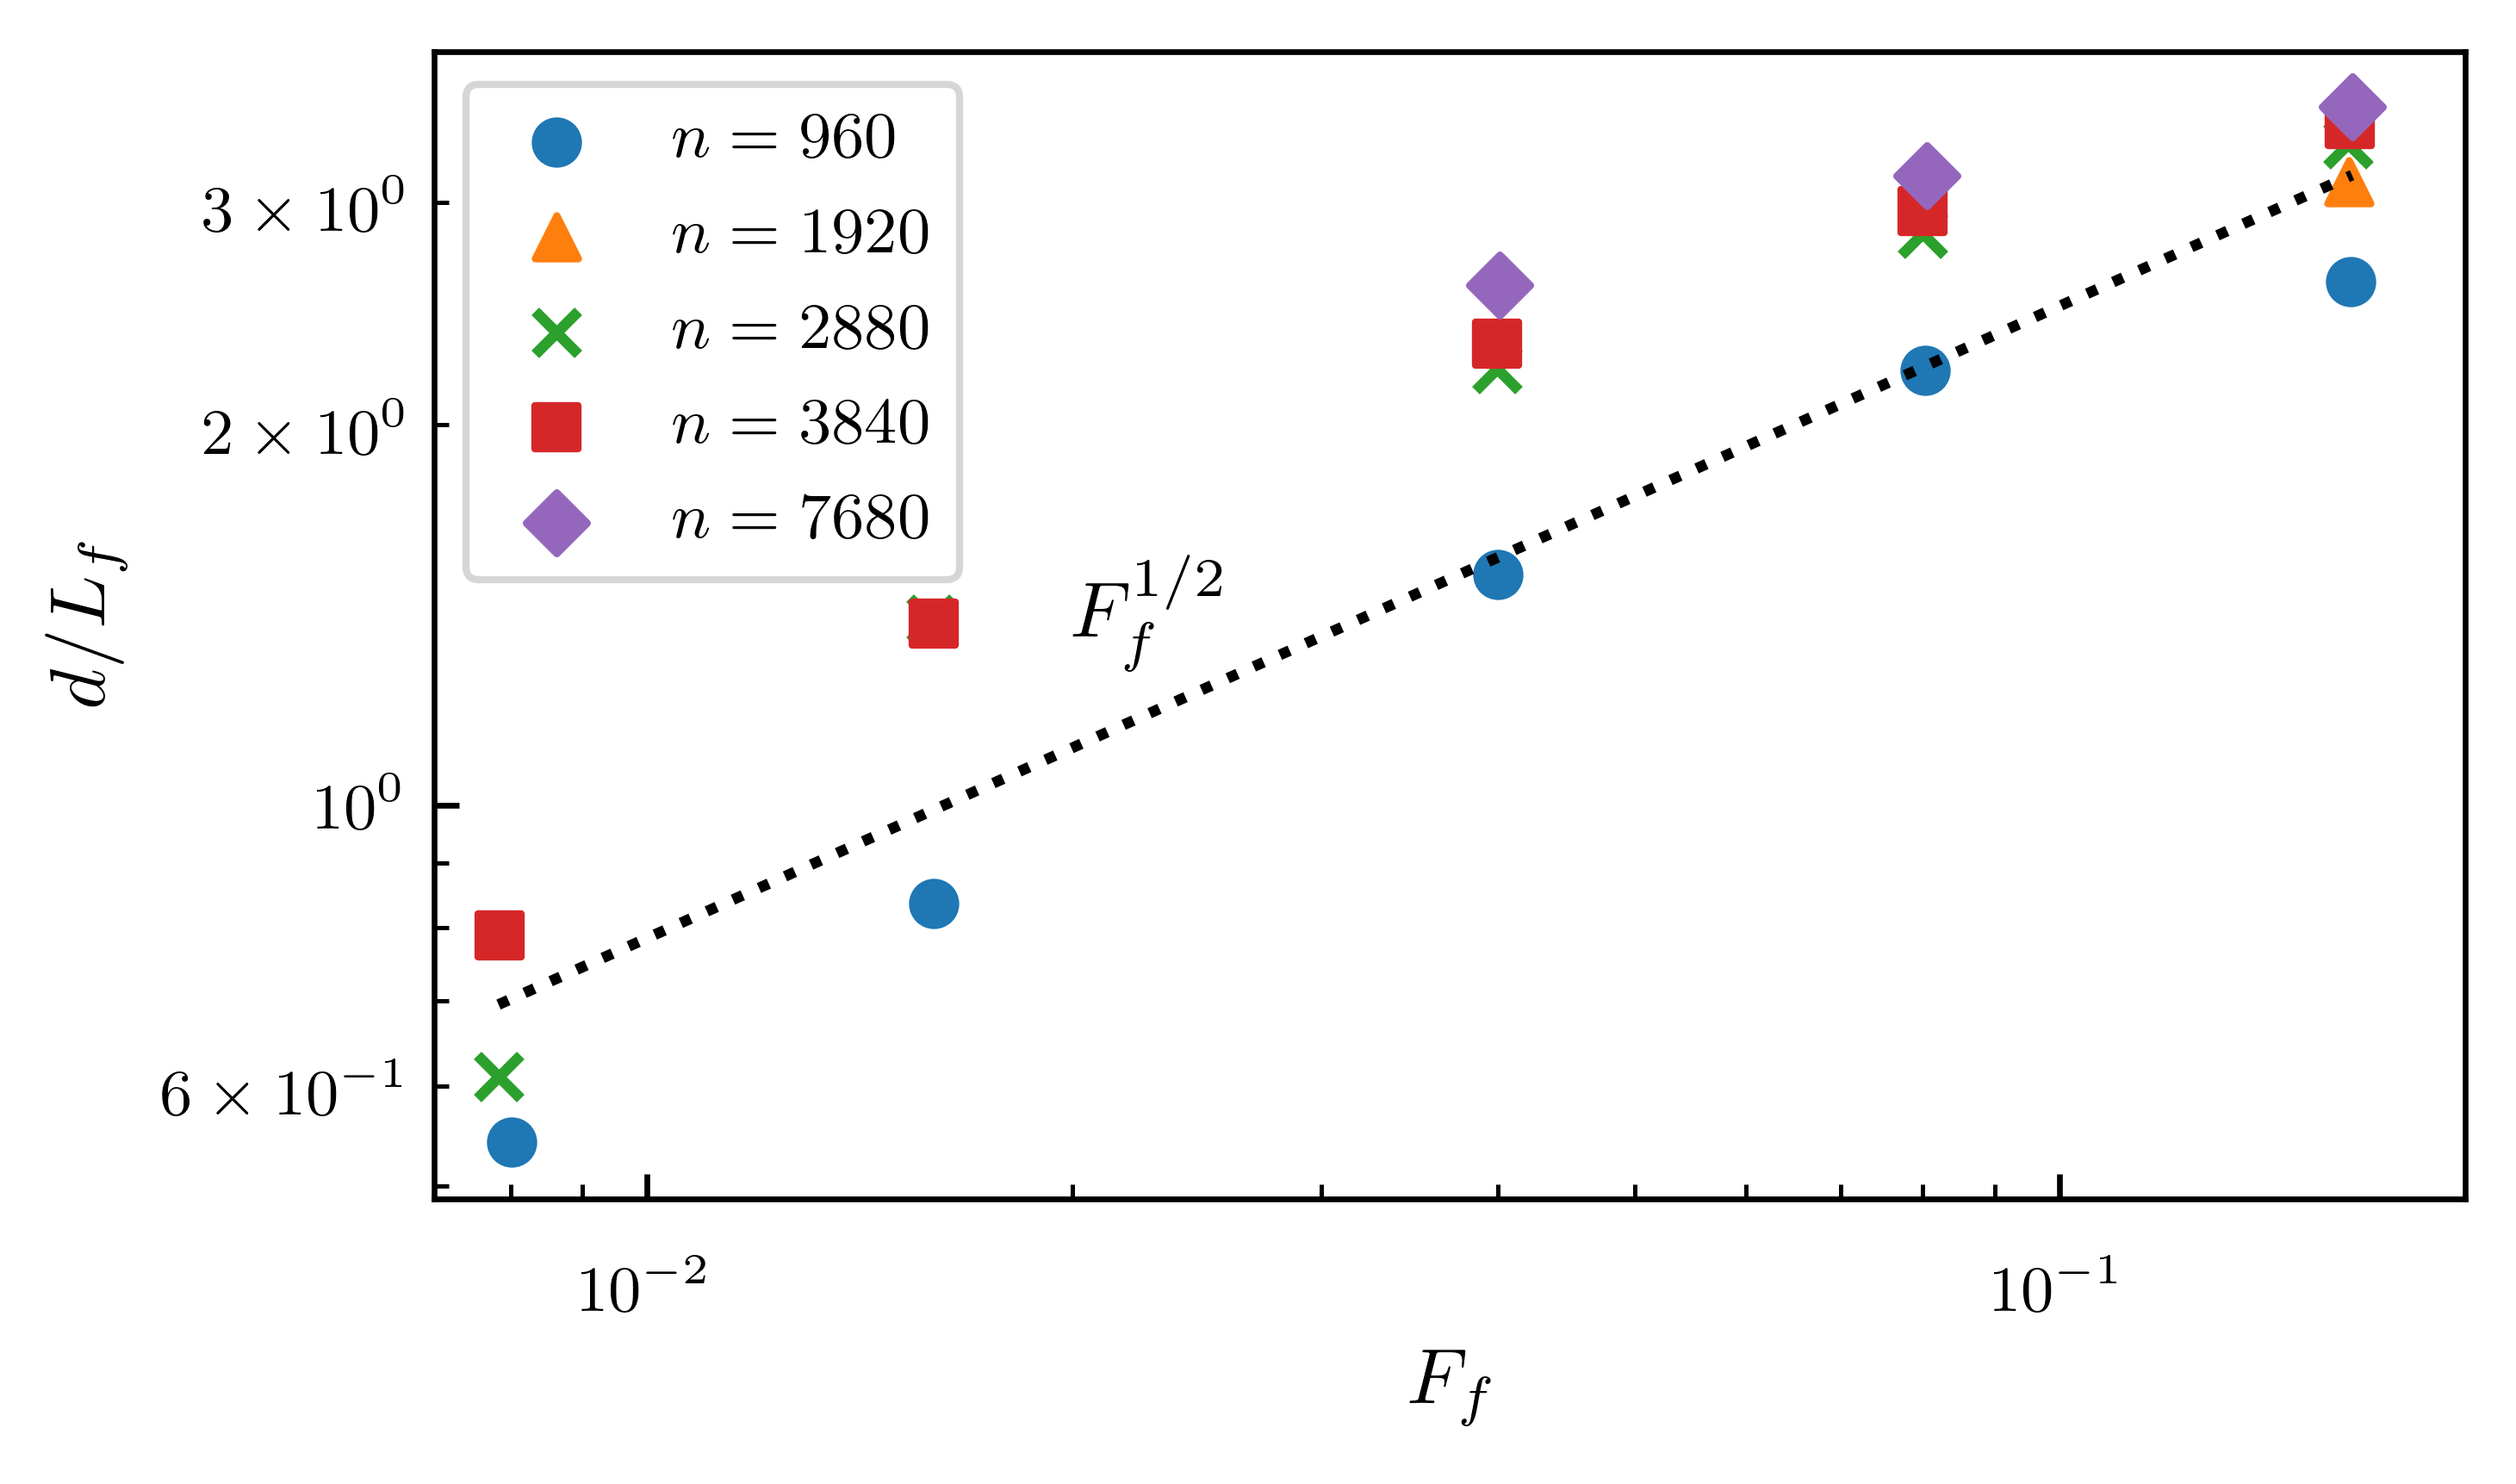

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from base import matplotlib_rc, markers

matplotlib_rc(11)
fig, ax = plt.subplots(figsize=(5,3))
mark = markers()
for n, grp in df.groupby("$n$"):
    ax.scatter(
        r'$F_f$', 'shock separation',
        marker=next(mark),
        #kind="scatter", loglog=True, ax=ax
        data=grp, label=f"$n={int(n)}$")


uniq_F_f = np.array(sorted(set(df[r'$F_f$'])))
ax.loglog(uniq_F_f, 2.5 * np.pi * uniq_F_f ** (1./2), 'k:', label="")

# import seaborn as sns
# sns.regplot(
#     '$F_f$', 'shock separation',
#     data=df,
#     scatter=False, ax=ax, truncate=True,
#     color="k", line_kws=dict(linestyle="dashed"),
#     # order=2,
#     logx=True,
#     # robust=True,  
# )
ax.set_xlim(df["$F_f$"].min() * 0.9)
ax.text(2e-2, 1.3, r"$F_f ^ {1/2}$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('$F_f$')
ax.set_ylabel("$d / L_f$")
ax.legend(fontsize=9)
fig.tight_layout()
plt.show()

In [10]:
fig.savefig("../Pyfig/fig_shock_sep_lap.png")
fig.savefig("../Pyfig/fig_shock_sep_lap.pdf")